In [3]:
import numpy as np
import quaternion
import math
from numpy import linalg as LA


x0 = [1, 0, 0]
y0 = [0, 1, 0]
z0 = [0, 0, 1]

x0_quat = quaternion.quaternion(0,1,0,0)
y0_quat = quaternion.quaternion(0,0,1,0)
z0_quat = quaternion.quaternion(0,0,0,1)

def get_new_frame(vect,angle=0):

    beta = angle*math.pi/180


    ### GOAL VECTOR (the desired Z axis)###
    goal = vect


    goal_norm = []
    for i in goal:
        goal_norm.append(i/LA.norm(goal)) #Normalized vector of goal

    ### VECTOR AND ANGLE OF ROTATION ###
    vector= np.cross(z0,goal_norm)

    vector_norm = [] #Normalized vector of rotation
    for i in vector:
        vector_norm.append(i/LA.norm(vector))

    alpha = math.acos(np.vdot(z0,goal_norm)) #Angle of rotation

    if alpha == 0 :
        v = quaternion.quaternion(0.0,0.0,0.0,1.0)

    else :  
        v = quaternion.quaternion(0.0,vector_norm[0],vector_norm[1],vector_norm[2]) #Vector of rotation as a quaternion





    ### QUATERNION OF ROTATION ###
    w1 = math.cos(alpha/2.0)
    x1 = math.sin(alpha/2.0)*v.x
    y1 = math.sin(alpha/2.0)*v.y
    z1 = math.sin(alpha/2.0)*v.z

    q1 = quaternion.quaternion(w1,x1,y1,z1) #1st rotation quaternion
    q1_inv = q1.inverse()

    z_prime = q1*z0_quat*q1_inv

    w2 = math.cos(beta/2.0)
    x2 = math.sin(beta/2.0)*z_prime.x
    y2 = math.sin(beta/2.0)*z_prime.y
    z2 = math.sin(beta/2.0)*z_prime.z

    q2 = quaternion.quaternion(w2,x2,y2,z2) #Quaternion of the rotation on new z axis
    q2_inv = q2.inverse()

    new_z = q2*z_prime*q2_inv #Final Z
    new_x = q2*(q1*x0_quat*q1_inv)*q2_inv #Final X
    new_y = q2*(q1*y0_quat*q1_inv)*q2_inv #Final Y

    X = [new_x.x, new_x.y, new_x.z]
    Y = [new_y.x, new_y.y, new_y.z]
    Z = [new_z.x, new_z.y, new_z.z]

    return X,Y,Z

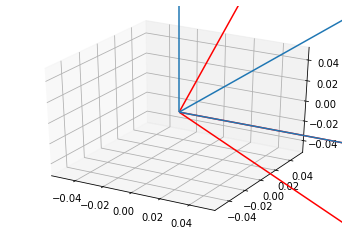

In [6]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

X,Y,Z = get_new_frame([0.0,1.0,1.0])

origin = [0,0,0]
X_, Y_, Z_ = zip(origin,origin,origin)
X0_,Y0_,Z0_ = zip(origin,origin,origin)
U, V, W = zip(X,Y,Z)
U0,V0,W0 = zip(x0,y0,z0)

fig = plt.figure()
ax = fig.add_subplot(1,1,1, projection='3d')
ax.quiver(X0_,Y0_,Z0_,U0,V0,W0,arrow_length_ratio=0.01)
ax.quiver(X_,Y_,Z_,U,V,W,arrow_length_ratio=0.01,color='r')
plt.show()

In [7]:
from sympy.solvers import *
from sympy.abc import a,b
from sympy import cos,sin



Pc = [0,0,83.40]   #Coordinates of the plateform's center
C = [0,0,64.64]   #Coordinates of the center of the proximal circle
R = 37.528   #Radius of the distal circle
Rp = R*math.cos(30.0*math.pi/180)   #Radius of the proximal center

eq1 = []

for i in range(3):
    eq1.append(Pc[i]+R*cos(a)*Z[i]+R*sin(a)*X[i]-(C[i]+Rp*cos(b)*x0[i]+Rp*sin(b)*y0[i])) 
print("eq1 : ",eq1)  #Equation to solve
res = solve([eq1[0],eq1[1]],a,b)
res_deg=[]
print(res)
for i in range(len(res)):
    res_deg.append([])
    for j in res[i]:
        res_deg[i].append(j*180/math.pi)   #Converts the results in a list and in degrees
print("combinaisons q31-q11 possibles : ",res_deg)

A = solve(eq1[2],a)   #Solving the 3rd equation gives q31 solutions
A_deg = []
for i in A:
    A_deg.append(i*180/math.pi)
q31 = 0
for i in range(len(A_deg)):
    if 0 <= A_deg[i] <= 180: #Keep the solution between 0° and 180°
        q31 = A_deg[i]
print("q31 = ",q31)

ecart = 1000
for i in range(len(res_deg)):
    diff = abs(res_deg[i][0]-q31)   #Choose the the q11 solution associated to the q31 solution
    if diff < ecart:
        ecart = diff
        indice = i
q11 = res_deg[indice][1]
print ("q11 = ",q11)

eq1 :  [37.528*sin(a) - 32.5002013532224*cos(b), -32.5002013532224*sin(b) + 26.5363032843688*cos(a), 26.5363032843688*cos(a) + 18.76]
[(-0.785398163397445, 2.52611294491940), (0.785398163397445, 0.615479708670391), (2.35619449019235, -0.615479708670391), (3.92699081698724, -2.52611294491940)]
combinaisons q31-q11 possibles :  [[-44.9999999999998, 144.735610317245], [44.9999999999998, 35.2643896827549], [135.000000000000, -35.2643896827549], [225.000000000000, -144.735610317245]]
q31 =  134.987787321625
q11 =  -35.2643896827549
